Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      600 non-null    float64
 1   energy            600 non-null    float64
 2   loudness          600 non-null    float64
 3   acousticness      600 non-null    float64
 4   instrumentalness  600 non-null    int64  
 5   valence           600 non-null    float64
 6   tempo             600 non-null    float64
 7   genre             600 non-null    object 
 8   like              600 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 42.3+ KB


,danceability,energy,loudness,acousticness,instrumentalness,valence,tempo,like
genre,,,,,,,,
country,2.10,2.92,3.83,0.68,0.00,1.72,1.90,0.00
edm,2.33,3.68,3.68,0.12,0.39,0.57,1.97,0.01
electronic,2.75,3.42,3.50,0.08,0.50,1.58,2.00,0.50
funk,2.77,2.15,2.77,1.27,0.42,2.77,1.19,1.00
hip hop,2.68,2.66,3.38,0.84,0.14,1.94,1.53,0.69
jazz,2.07,1.92,2.58,1.65,0.72,2.21,1.57,1.00
pop,2.65,2.86,3.64,0.73,0.06,1.84,1.86,0.20
r&b,2.56,2.09,2.88,1.22,0.16,2.03,1.44,0.94
rock,2.15,2.59,3.26,0.90,0.26,1.97,1.92,0.82


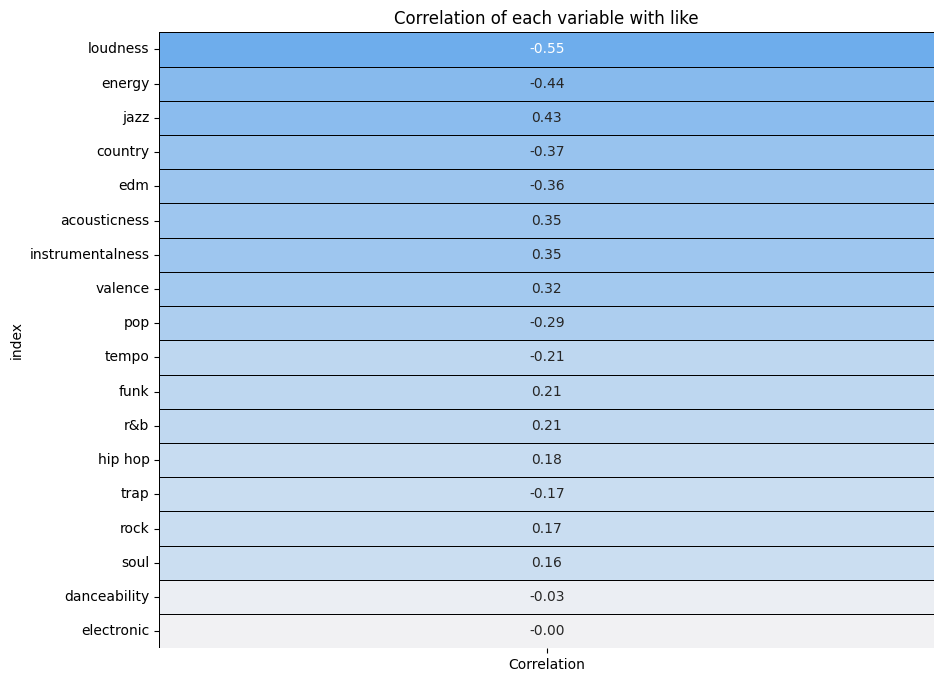

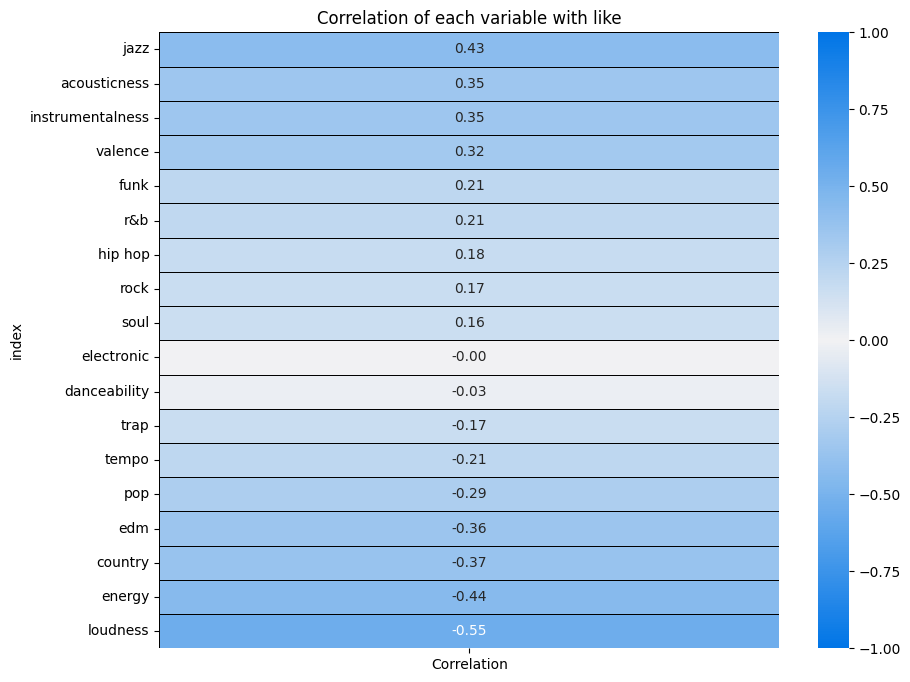

Text(0.5, 28.64722222222222, 'Predicted label')

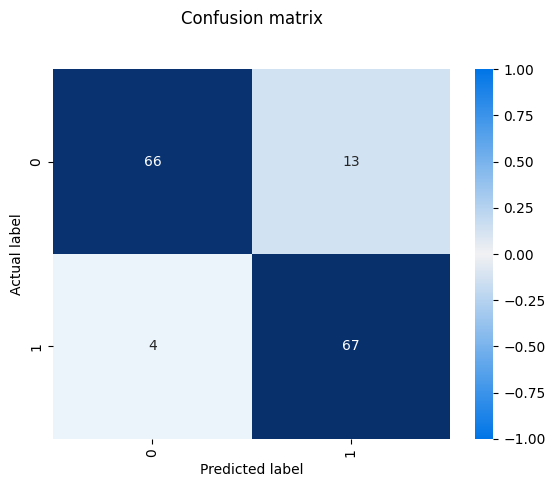

In [16]:
import pandas as pd
import numpy as np

#connect to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Import customers data (downloaded from Bloomreach) and and specify all columns as strings (they will be changed later)
spotifydata = pd.read_csv('/content/gdrive/MyDrive/Training + learning/Data Science apprenticeship degree/Modules/M5/Music analysis/spotifyData.csv')
spotifydata.drop(spotifydata.columns[0],axis=1,inplace=True)

# Check for missing values - returns no values, so no further action required
  # print(spotifydata.isnull().sum())

# Map the numerical genre codes with descriptive labels, for easier downstream interpretation
di = { 1: 'country', 2:'trap',3:'edm', 4:'electronic', 5: 'funk', 6: 'rock', 7: 'hip hop', 8: 'soul', 9: 'r&b', 10: 'jazz', 11: 'pop'}
spotifydata['genre'] = spotifydata['genre'].map(di)


# Check data types, and convert them if needed
spotifydata.info()
spotifydata['like'] = spotifydata['like'].astype(bool)


# Add some EDA steps here:
  # Check the target variable is balanced between likes and dislikes
  # Understand the mix of the predictors, e.g. plot a bar chart of the genres to see the split, and stack the colours based on if they are liked/not liked - to easily visualise preferred genres
  # Look for outliers in the numerical predictors (whisker plots?)
  # Sum this up in some bullets, e.g. "The average energy rating of liked songs is higher than disliked songs / The user prefers high energy songs"

# Group by 'genre' and calculate the mean, then display the results as a table with values rounded to 2 decimal places
grouped_data = spotifydata.groupby('genre').mean()
from IPython.display import display
display(grouped_data.apply(lambda x: round(x, 2)))


grouped_data_2 = spotifydata.groupby(['genre', 'like']).size().reset_index(name='count')
import plotly.express as px
fig = px.bar(grouped_data_2, x="genre", y="count", color="like",
             pattern_shape="like", pattern_shape_sequence=["x",""],
             barmode='stack',
             color_discrete_map={False: 'red', True: 'green'},
             labels={"count": "Number of songs", "genre": "Song genre",})
fig.update_layout(title={
        'text': "Number of liked and disliked songs by genre", 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})
fig.update_layout({'plot_bgcolor': '#f6f6f6', 'paper_bgcolor': 'white'})
fig.update_layout(legend_title=None)
def custom_legend_name(new_names):
    for i, new_name in enumerate(new_names):
        fig.data[i].name = new_name
custom_legend_name(['Dislike','Like'])
fig.show()


# Pivot the genre column into its own table, so it is in the required format (each value as a separate column). Replace non-matching values with 0.
genre = spotifydata.pivot(columns='genre', values='genre').reset_index().fillna('0')
genre.drop(genre.columns[0],axis=1,inplace=True)

# Replace all non-0 values with 1
genre["country"]=genre["country"].replace('country', '1')
genre["trap"]=genre["trap"].replace('trap', '1')
genre["edm"]=genre["edm"].replace('edm', '1')
genre["electronic"]=genre["electronic"].replace('electronic', '1')
genre["funk"]=genre["funk"].replace('funk', '1')
genre["rock"]=genre["rock"].replace('rock', '1')
genre["hip hop"]=genre["hip hop"].replace('hip hop', '1')
genre["soul"]=genre["soul"].replace('soul', '1')
genre["r&b"]=genre["r&b"].replace('r&b', '1')
genre["jazz"]=genre["jazz"].replace('jazz', '1')
genre["pop"]=genre["pop"].replace('pop', '1')

# Change data types to integer
genre = genre.apply(pd.to_numeric)

# Merge the pivoted genre table with the original table (by default this is an inner join, which is what we need here), and drop the original genre column
spotifydata = pd.merge(spotifydata, genre, left_index=True, right_index=True)
spotifydata = spotifydata.drop('genre', axis=1)

# check for missing values in any of the columns
  # spotifydata.info()

# check data types with this
  # print(spotifydata.dtypes)



import matplotlib.pyplot as plt
import seaborn as sns

# set the target variable
target_column = 'like'

# Calculate the correlation matrix
correlation_matrix = spotifydata.corr()

# Get the correlations with the target column
target_correlations = correlation_matrix[target_column]

# Drop the correlation of the target column with itself
target_correlations = target_correlations.drop(labels=[target_column])

# Convert the series to a DataFrame for better visualization
target_correlations_df = target_correlations.reset_index().rename(columns={target_column: 'Correlation'})

# Set the index to the predictor variables
target_correlations_df = target_correlations_df.set_index('index')
target_correlations_df = target_correlations_df.sort_values(by=['Correlation'], key=abs, ascending=False)
# Plot the heatmap version 1
plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(255,255, s=100, as_cmap=True)
sns.heatmap(target_correlations_df, annot=True, cmap=cmap, vmin=-1, vmax=1, fmt='.2f', linewidths=0.5, linecolor='black', cbar=False)
plt.title(f'Correlation of each variable with {target_column}')
plt.show()

# Set the index to the predictor variables
target_correlations_df = target_correlations_df.sort_values(by=['Correlation'], ascending=False)
# Plot the heatmap version 1
plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(255,255, s=100, as_cmap=True)
sns.heatmap(target_correlations_df, annot=True, cmap=cmap, vmin=-1, vmax=1, fmt='.2f', linewidths=0.5, linecolor='black')
plt.title(f'Correlation of each variable with {target_column}')
plt.show()

# check for multicollinearity
sns.heatmap(spotifydata.corr(), annot=False, cmap=cmap, vmin=-1, vmax=1, fmt='.2f', linewidths=0.5, linecolor='black')

# Split dataset into predictor and target variables
predictor_variables = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'country', 'trap', 'edm', 'electronic', 'funk', 'rock', 'hip hop', 'soul', 'r&b', 'jazz', 'pop']
X = spotifydata[predictor_variables] # Predictors
y = spotifydata.like # Target variable

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# import the class
from sklearn.linear_model import LogisticRegression

# Run the model
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Create a confusion matrix
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="Blues", fmt='g', cbar=False, vmin=0)
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
